In [2]:
# Import Meteostat library and dependencies
from datetime import datetime
import matplotlib.pyplot as plt
from meteostat import Point, Daily, Normals, Stations, Hourly, Monthly
import pandas as pd
import numpy as np
import seaborn as sns

In [51]:
# Set time period
start = datetime(2003, 1, 1)
end = datetime(2023, 12, 31)

# Get hourly data
data = Monthly('72327', start, end)
data = data.fetch()

# Print DataFrame
print(data)

            tavg  tmin  tmax   prcp  wspd    pres  tsun
time                                                   
2003-01-01   0.3  -4.4   5.1   40.0  12.3  1022.8   NaN
2003-02-01   3.3  -0.8   7.4  215.0  11.7  1018.5   NaN
2003-03-01  11.1   4.9  17.4   58.0  11.6  1014.9   0.0
2003-04-01  16.0  10.1  21.9  119.0  13.1  1015.2   NaN
2003-05-01  19.6  14.8  24.4  201.0  12.1  1013.9   NaN
...          ...   ...   ...    ...   ...     ...   ...
2022-09-01  22.7  16.5  29.4   36.4   9.9  1017.3   NaN
2022-10-01  15.7   8.9  23.0   35.2  11.2  1018.8   NaN
2022-11-01  10.9   4.9  17.2  111.3  10.0  1022.0   NaN
2022-12-01   6.7   1.2  11.2  114.3  11.4  1021.4   NaN
2023-01-01   8.6   3.1  13.4  131.2  12.8  1018.6   NaN

[241 rows x 7 columns]


In [52]:
data.columns

Index(['tavg', 'tmin', 'tmax', 'prcp', 'wspd', 'pres', 'tsun'], dtype='object')

In [53]:
# Get nearby weather stations
stations = Stations()
stations = stations.nearby(36.174465, -86.767960)
station = stations.fetch(1)

# Print DataFrame
print(station)

                    name country region    wmo  icao  latitude  longitude  \
id                                                                          
72327  Nashville Airport      US     TN  72327  KBNA   36.1167   -86.6833   

       elevation         timezone hourly_start hourly_end daily_start  \
id                                                                      
72327      183.0  America/Chicago   1951-01-01 2023-02-03  1948-01-01   

       daily_end monthly_start monthly_end     distance  
id                                                       
72327 2023-01-20    1948-01-01  2022-01-01  9952.118985  


[Text(0.5, 0, 'Temp Avg (Celsius)'),
 Text(0, 0.5, 'Wind Speed (KM/H)'),
 Text(0.5, 1.0, 'Average Temperature vs Wind Speed')]

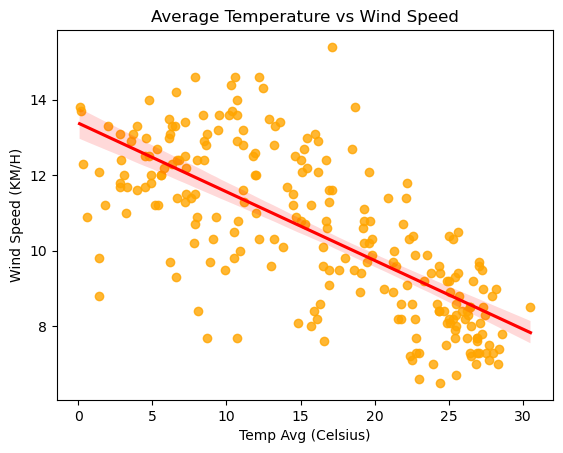

In [54]:
#temp avg/wind speed
ax = sns.regplot(data['tavg'], data['wspd'], scatter_kws={"color": "orange"}, line_kws={"color": "red"})
ax.set(xlabel='Temp Avg (Celsius)',
       ylabel='Wind Speed (KM/H)',
       title='Average Temperature vs Wind Speed')

[Text(0.5, 0, 'Precipitation (mm)'),
 Text(0, 0.5, 'Wind Speed (KM/H)'),
 Text(0.5, 1.0, 'Precipitation vs Wind Speed')]

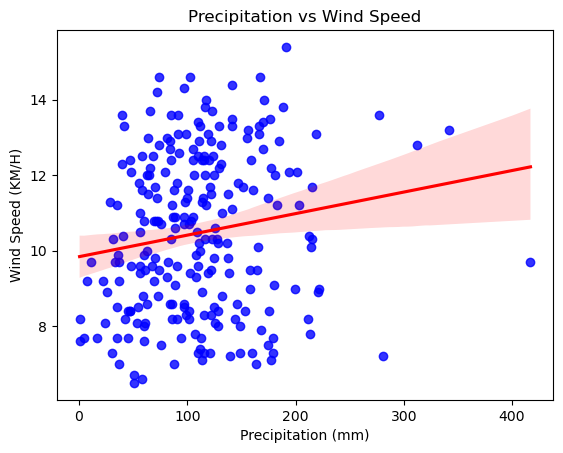

In [55]:
#precipitation/wind speed
bx = sns.regplot(data['prcp'], data['wspd'], scatter_kws={"color": "blue"}, line_kws={"color": "red"})
bx.set(xlabel='Precipitation (mm)',
       ylabel='Wind Speed (KM/H)',
       title='Precipitation vs Wind Speed')

[Text(0.5, 0, 'Minimum Temperature'),
 Text(0, 0.5, 'Maximum Temperature'),
 Text(0.5, 1.0, 'Minimum/Maximum Temperature (C)')]

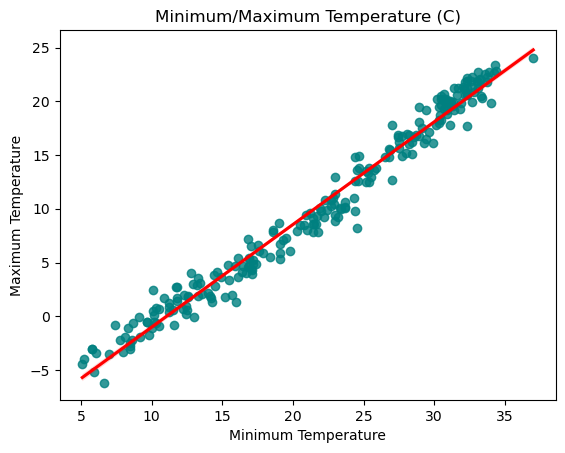

In [56]:
#Min vs Max Temp
cx = sns.regplot(data['tmax'], data['tmin'], scatter_kws={"color": "teal"}, line_kws={"color": "red"})
cx.set(xlabel='Minimum Temperature',
       ylabel='Maximum Temperature',
       title='Minimum/Maximum Temperature (C)')

[Text(0.5, 0, 'Air Pressure (hPa)'),
 Text(0, 0.5, 'Precipitation (mm)'),
 Text(0.5, 1.0, 'Air Pressure/Precipitation')]

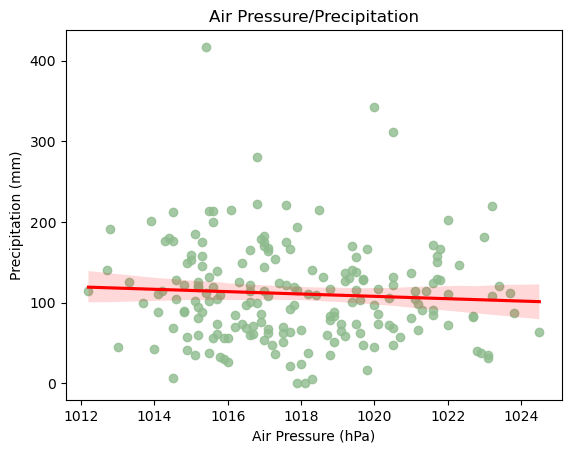

In [57]:
#Pressure vs Precipitation
dx = sns.regplot(data['pres'], data['prcp'], scatter_kws={"color": "darkseagreen"}, line_kws={"color": "red"})
dx.set(xlabel='Air Pressure (hPa)',
       ylabel='Precipitation (mm)',
       title='Air Pressure/Precipitation')